<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/RNNTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import files

In [ ]:
ecg_train = np.load(f'drive/MyDrive/ecg_trainv1.2.npy')

In [ ]:
ecg_train.shape

(222075, 2000)

In [ ]:
ecg_test = np.load(f'drive/MyDrive/ecg_testv1.2.npy')

In [ ]:
rrtag_train = np.load(f'drive/MyDrive/rrtag_trainv1.2.npy')

In [ ]:
rrtag_test = np.load(f'drive/MyDrive/rrtag_testv1.2.npy')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(None, 1)), # LSTM слой для обработки временных последовательностей
    tf.keras.layers.Dense(1, activation='sigmoid') # Полносвязный слой с сигмоидной активацией для предсказания меток r-пиков
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(ecg_train, rrtag_train, epochs=10)

Epoch 1/10
6940/6940 [==============================] - 383s 54ms/step - loss: 0.0095
Epoch 2/10
6940/6940 [==============================] - 374s 54ms/step - loss: 0.0048
Epoch 3/10
6940/6940 [==============================] - 375s 54ms/step - loss: 0.0041
Epoch 4/10
6940/6940 [==============================] - 375s 54ms/step - loss: 0.0037
Epoch 5/10
6940/6940 [==============================] - 374s 54ms/step - loss: 0.0035
Epoch 6/10
6940/6940 [==============================] - 376s 54ms/step - loss: 0.0033
Epoch 7/10
6940/6940 [==============================] - 375s 54ms/step - loss: 0.0032
Epoch 8/10
6940/6940 [==============================] - 374s 54ms/step - loss: 0.0031
Epoch 9/10
6940/6940 [==============================] - 376s 54ms/step - loss: 0.0031
Epoch 10/10
6940/6940 [==============================] - 377s 54ms/step - loss: 0.0030


In [ ]:
predictions = model.predict(dataset_ecg)

130/130 [==============================] - 36s 271ms/step


In [ ]:
rr_predictions = predictions.squeeze()
print(rr_predictions)

[[2.04473854e-05 1.07920371e-07 2.27713244e-07 ... 1.23666105e-05
  1.73330500e-05 2.98236409e-05]
 [4.50853840e-05 3.17973928e-07 1.22206345e-07 ... 3.89578890e-05
  2.20318252e-05 3.51223862e-05]
 [1.77150177e-05 2.91222477e-07 1.64647452e-06 ... 1.64535377e-05
  3.83828228e-06 2.64072173e-06]
 ...
 [1.93751002e-05 7.18115302e-07 8.97985683e-06 ... 7.48149023e-06
  2.73457658e-06 3.39941175e-06]
 [8.45711504e-04 9.97074021e-05 4.35480237e-04 ... 1.34994332e-06
  7.00163469e-07 8.28389659e-07]
 [6.55206270e-04 3.82133157e-06 3.04719401e-06 ... 3.47418381e-06
  7.58894203e-06 8.95068388e-06]]


In [ ]:
np.max(rr_predictions[1])

0.018295234

In [ ]:
import matplotlib.pyplot as plt

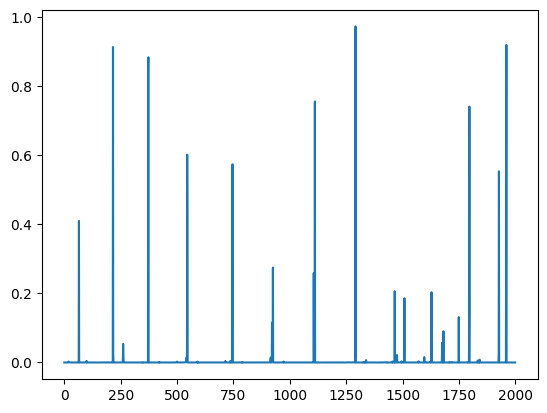

In [ ]:

plt.plot(rr_predictions[26])

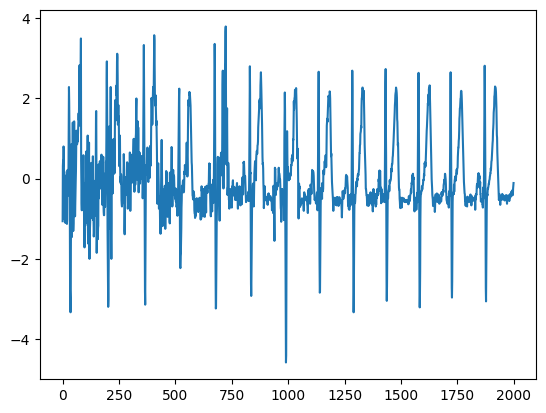

In [ ]:
plt.plot(dataset_ecg[27])

In [ ]:
array = rr_predictions[:1]
for x in rr_predictions[1]:
  print(x)

In [ ]:
loss = model.evaluate(ecg_test, rrtag_test)
print("Loss на тестовых данных:", loss)


In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
model.save('model10.h5')

# Загрузка файла на Google Диск
upload_file = drive.CreateFile({'title': 'model10.h5'})
upload_file.SetContentFile('model10.h5')
upload_file.Upload()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
file_id = '1HHx06KnC-Nl-8E2U1j8wx-R9CsH2Zkda'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('model10.h5')

# Загрузка модели с файла
from keras.models import load_model
model = load_model('model10.h5')

In [ ]:
ecg_diff = np.diff(dataset_ecg[101])

In [ ]:
threshold = np.mean(np.abs(ecg_diff)) * 1.5
threshold

0.1764061376452446

In [ ]:
threshold = 0.2

In [ ]:
r_peaks = np.where(np.abs(rr_predictions[26]) > threshold)[0]
r_peaks

array([  65,  216,  372,  373,  545,  546,  745,  746,  925, 1106, 1111,
       1291, 1465, 1628, 1796, 1927, 1959, 1960])

In [ ]:
fs = 2000
t = np.linspace(0, 1, fs)

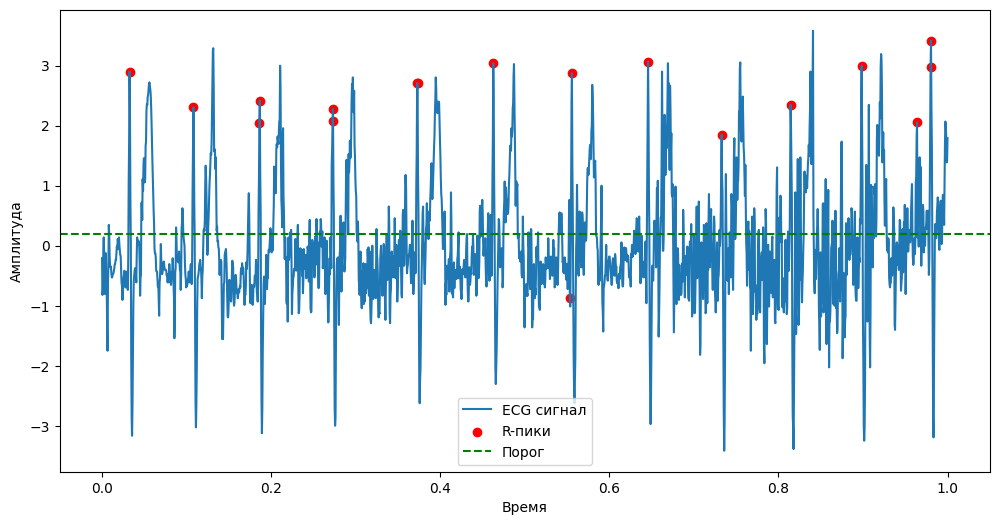

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, dataset_ecg[26], label='ECG сигнал')
plt.scatter(t[r_peaks], dataset_ecg[26][r_peaks], color='red', label='R-пики')
plt.axhline(y=threshold, color='green', linestyle='--', label='Порог')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.show()

In [ ]:
ecg_person = np.load(f'drive/MyDrive/B000901_ecg.npy')
ecg_person /= 1000

In [ ]:
ecg1 = np.array(ecg_person[254000:255000])

In [ ]:
n_samp = ecg1.shape[0]
std_ecg = np.zeros((n_samp, ecg1.shape[0]), dtype=np.float32)
for i in range(n_samp):
   std_ecg[i] = (ecg1[i] - np.mean(ecg1[i]))/(np.std(ecg1) + 1e-9)

In [ ]:
n_samp = ecg2.shape[0]
std_ecg = np.zeros((n_samp, ecg1.shape[0]), dtype=np.float32)
for i in range(n_samp):
   std_ecg[i] = (ecg1[i] - np.mean(ecg1[i]))/(np.std(ecg1) + 1e-9)

In [ ]:
ecg1 = np.array(ecg_person[255000:256000])
ecg2 = np.array(ecg_person[256000:257000])
ecg3 = np.array(ecg_person[257000:258000])
ecg4 = np.array(ecg_person[256000:257000])

In [ ]:
test = []
test.append(ecg1)
test.append(ecg2)
test.append(ecg3)
test.append(ecg4)

In [ ]:
combined_input = tf.concat([ecg1, ecg2, ecg3, ecg4], axis=0)

In [ ]:
print(input_data_expanded)

tf.Tensor(
[[-0.07336894 -0.10023037 -0.0990094  ...  0.13175473  0.01576218
  -0.00987828]], shape=(1, 4000), dtype=float64)


In [ ]:
input_data_expanded = tf.expand_dims(combined_input, axis=0)

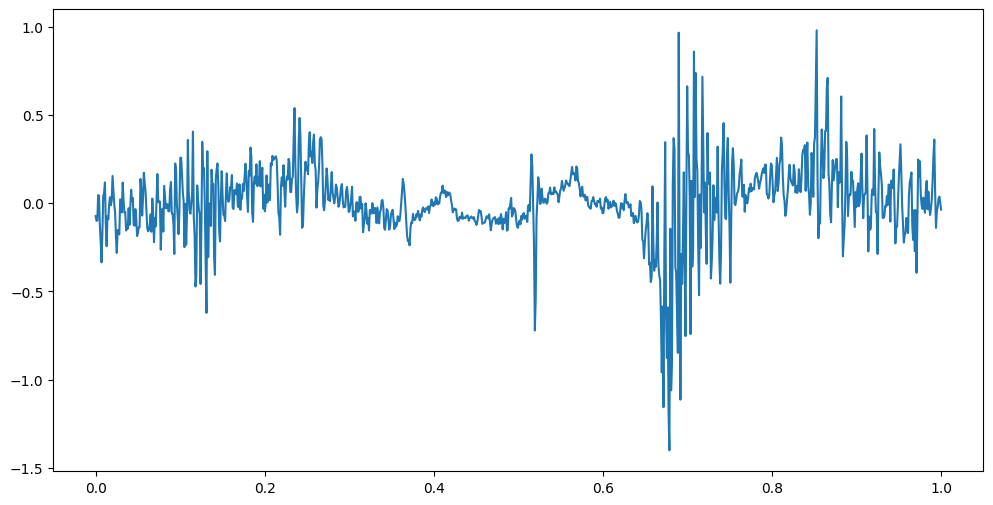

In [ ]:
fs = 1000
t = np.linspace(0, 1, fs)
plt.figure(figsize=(12, 6))
plt.plot(t, ecg1, label='ECG сигнал')

In [ ]:
def split_data(ecg, fsamp=200):
    window_len = int(fsamp * 10)
    shift = int(fsamp*8)
    n_win = int((len(ecg) - window_len) // shift)

    splited_ecg = np.zeros((n_win, window_len), dtype=np.float32)
    splited_rrtag = np.zeros((n_win, window_len), dtype=np.float32)
    a = 0
    b = window_len
    for w_i in range(n_win):
        splited_ecg[w_i, :] = ecg[a:b]

        a += shift
        b += shift
    return splited_ecg

In [ ]:
def standartization(ecg):
    n_samp = ecg.shape[0]
    std_ecg = np.zeros((n_samp, ecg.shape[1]), dtype=np.float32)
    for i in range(n_samp):
        std_ecg[i] = (ecg[i] - np.mean(ecg[i]))/(np.std(ecg[i]) + 1e-9)
    return std_ecg

In [ ]:
ecg = np.load(f'drive/MyDrive/B000901_ecg.npy').astype(np.float32)
splited_ecg = split_data(ecg)
dataset_ecg = standartization(splited_ecg)

In [ ]:
dataset_ecg

array([[-7.6833838e-01, -7.6833838e-01, -1.0671134e+00, ...,
        -8.5260820e-01, -4.3125886e-01,  6.6699617e-02],
       [-1.3325471e+00, -1.2404416e+00, -1.0349754e+00, ...,
         8.2838976e-01,  1.1613866e+00,  1.3668526e+00],
       [-4.3208751e-01,  6.2731167e-05,  4.5312345e-01, ...,
         1.3801554e+00,  1.1919609e+00,  8.8527364e-01],
       ...,
       [-2.5225076e-01,  1.7958409e-01,  6.3231421e-01, ...,
         1.2731013e+00,  1.0293236e+00,  6.8803483e-01],
       [ 1.2423016e+00,  1.3955655e+00,  1.4025320e+00, ...,
        -1.0920750e-01, -5.4113311e-01, -9.2429286e-01],
       [ 1.0607414e+00,  7.1953493e-01,  3.1565782e-01, ...,
        -1.3764479e+00, -1.4182284e+00, -1.3207408e+00]], dtype=float32)

In [ ]:
import numpy as np
import pylab as pl
!pip install neurokit2
!pip install wfdb
import neurokit2 as nk
import wfdb
import wfdb.processing
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
Fs = 200
ns = 2000
time = pl.arange(ns)
ecgsignal = np.array(dataset_ecg[101])
_, results = nk.ecg_peaks(ecgsignal, sampling_rate=Fs, method="emrich2023")
rpeaks = results["ECG_R_Peaks"]
fig = wfdb.plot_items(
    ecgsignal,
    [rpeaks],
    fs=Fs,
    sig_name=["ECG"],
    sig_units=["mV"],
    time_units="seconds",
    return_fig=True,
    ann_style="o",
)


ValueError: NeuroKit error: ecg_findpeaks(): 'emrich2023' not implemented.